In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### You may need to clone the latest version of [pyathena](https://github.com/changgoo/pyathena)

In [2]:
from pyathena import dump_zprof

In [4]:
# Here, I define a data_container class to set 
# vtk file path, parameter file path, and history file path, 
# and read parameter and history.
# 
# Basically I assume the path to the vtk/par/hst files looks like
#
#    /base/pdir/pid/id0/pid.????.vtk
#    /base/pdir/pid/pid.par
#    /base/pdir/pid/hst/pid.hst
#
# You can modify the path appropriately
#

base='/tigress/changgoo/ARM/'
vtkbase='/tigress/woongkim/TWO/'
pid='R8_Beta10_F10_two'
pdir=pid + '/'
dc=dump_zprof.data_container(pid,base=base,pdir=pdir,vtkbase=vtkbase)

Reading a history file:/tigress/changgoo/ARM/R8_Beta10_F10_two//hst/R8_Beta10_F10_two.hst.p


# Recalculate z-profiles from vtk

Below (`dump_zprof_one`) is a function to calculate horizontally-integrated vertical-profiles from a vtk dump. The result will be saved to (`/base/pdir/pid/zprof_icm/pid.????.phase-icm.zprof`). The same calculate is done to create `zprof`, but now it creates additional zprof for ICM, multplying by `f_icm` (`specific_scalar4`). For example, density profile is defined by
$$ \rho(k) \equiv \sum_{i,j} \rho(i,j,k) \Delta x \Delta y $$
$$ \rho_{\rm ICM}(k) \equiv \sum_{i,j} \rho(i,j,k)f_{\rm ICM}(i,j,k) \Delta x \Delta y $$
In practice, we also separate it into 5 thermal phases.

In [5]:
dc.base

'/tigress/changgoo/ARM/'

In [6]:
zpdf=dump_zprof.dump_zprof_one(dc.vtkfiles[-1],dc,outdir='zprof')


Reading:  /tigress/woongkim/TWO/id0/R8_Beta10_F10_two.0709.vtk
Calculating zprof...
0/8 1/8 2/8 3/8 4/8 5/8 6/8 7/8 
Writing at /tigress/changgoo/ARM/R8_Beta10_F10_two/zprof/: 
phase1 phase2 phase3 phase4 phase5 

### sanity check

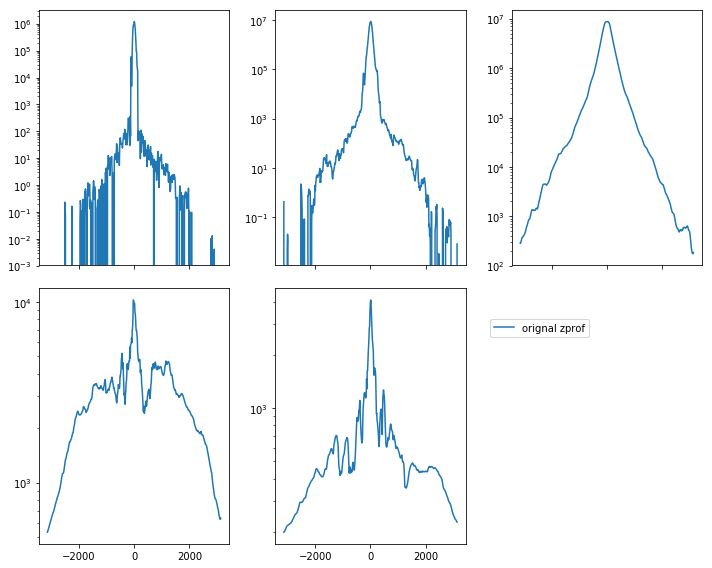

In [52]:
import pyathena.preprocessing as pre
import matplotlib.pyplot as plt

fig,axes=plt.subplots(2,3,figsize=(10,8),sharex=True)
field='d'
plist=['phase1','phase2','phase3','phase4','phase5']
for ph,ax in zip(plist,axes.flat):
    zp_orig,time=pre.read_zprof_one(base+pdir+'zprof/'+pid+'.0709.{}.zprof'.format(ph))
    ax.plot(zp_orig['z'],zp_orig[field],label='orignal zprof')
    ax.set_yscale('log')
axes.flat[-1].axis('off')

plt.tight_layout()
ax.legend(loc='upper left',bbox_to_anchor=[1.1,0.9])

### Below is a code to recalculate zprof from all the vtk files

In [ ]:
import os
import gc
pid_list=['R8_Beta10_F20_two','R8_Beta10_F10_two','R8_Binf_F20_two','R8_Binf_F10_two']

base='/tigress/changgoo/ARM/'
vtkbase='/tigress/woongkim/TWO/'
plist=['phase1','phase2','phase3','phase4','phase5']

for pid in pid_list:
    pdir=pid + '/'

    outdir='zprof'
    if not os.path.isdir(base+pdir+outdir+'/'): os.mkdir(base+pdir+outdir)
    
    dc=dump_zprof.data_container(pid,base=base,pdir=pdir,vtkbase=vtkbase)
    for f in dc.vtkfiles:
        dirname=base+pdir+outdir+'/'
        fbase=os.path.basename(f)
        phase=plist[-1]
        zpf=dirname+fbase.replace('vtk','%s.zprof' % phase)
        if not os.path.isfile(zpf):
            zp=dump_zprof.dump_zprof_one(f,dc,outdir=outdir)
            n=gc.collect()
            print('GC objects:',n)

Reading a history file:/tigress/changgoo/ARM/R8_Beta10_F20_two//hst/R8_Beta10_F20_two.hst.p

Reading:  /tigress/woongkim/TWO/id0/R8_Beta10_F20_two.0649.vtk
Calculating zprof...
0/8 1/8 2/8 3/8 4/8 5/8 6/8 7/8 
Writing at /tigress/changgoo/ARM/R8_Beta10_F20_two/zprof/: 
phase1 phase2 phase3 phase4 phase5 GC objects: 0

Reading:  /tigress/woongkim/TWO/id0/R8_Beta10_F20_two.0650.vtk
Calculating zprof...
0/8 1/8 2/8 3/8 4/8 5/8 6/8 7/8 
Writing at /tigress/changgoo/ARM/R8_Beta10_F20_two/zprof/: 
phase1 phase2 phase3 phase4 phase5 GC objects: 7663

Reading:  /tigress/woongkim/TWO/id0/R8_Beta10_F20_two.0651.vtk
Calculating zprof...
0/8 1/8 2/8 3/8 4/8 5/8 6/8 7/8 
Writing at /tigress/changgoo/ARM/R8_Beta10_F20_two/zprof/: 
phase1 phase2 phase3 phase4 phase5 GC objects: 7663

Reading:  /tigress/woongkim/TWO/id0/R8_Beta10_F20_two.0652.vtk
Calculating zprof...
0/8 1/8 2/8 3/8 4/8 5/8 6/8 7/8 
Writing at /tigress/changgoo/ARM/R8_Beta10_F20_two/zprof/: 
phase1 phase2 phase3 phase4 phase5 GC objec